# test 1

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("itachi9604/disease-symptom-description-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'disease-symptom-description-dataset' dataset.
Path to dataset files: /kaggle/input/disease-symptom-description-dataset


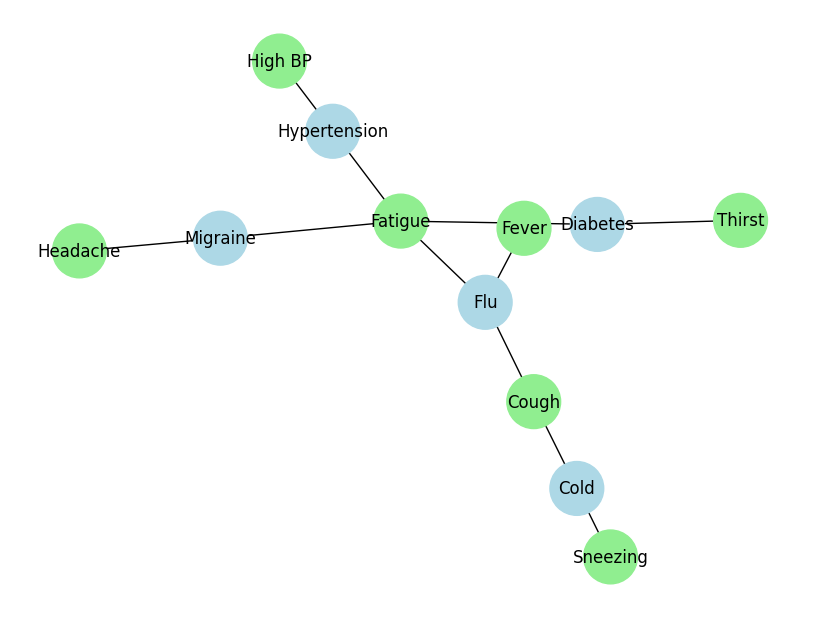

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Define diseases and symptoms
diseases = ["Flu", "Cold", "Diabetes", "Hypertension", "Migraine"]
symptoms = ["Fever", "Cough", "Fatigue", "Headache", "High BP", "Thirst", "Sneezing"]

# Create bipartite graph
G = nx.Graph()
G.add_nodes_from(diseases, bipartite=0)   # Disease nodes
G.add_nodes_from(symptoms, bipartite=1)   # Symptom nodes

# Randomly connect diseases to symptoms
edges = [
    ("Flu", "Fever"), ("Flu", "Cough"), ("Flu", "Fatigue"),
    ("Cold", "Cough"), ("Cold", "Sneezing"),
    ("Diabetes", "Thirst"), ("Diabetes", "Fatigue"),
    ("Hypertension", "High BP"), ("Hypertension", "Fatigue"),
    ("Migraine", "Headache"), ("Migraine", "Fatigue")
]
G.add_edges_from(edges)

# Visualize network
pos = nx.spring_layout(G)
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color=["lightblue" if n in diseases else "lightgreen" for n in G.nodes()], node_size=1500, font_size=12)
plt.show()

In [3]:
from community import community_louvain

partition = community_louvain.best_partition(G)
print("Node Communities:", partition)


Node Communities: {'Flu': 0, 'Cold': 0, 'Diabetes': 2, 'Hypertension': 1, 'Migraine': 2, 'Fever': 0, 'Cough': 0, 'Fatigue': 2, 'Headache': 2, 'High BP': 1, 'Thirst': 2, 'Sneezing': 0}


In [4]:
deg_cent = nx.degree_centrality(G)
bet_cent = nx.betweenness_centrality(G)

print("Degree Centrality:", deg_cent)
print("Betweenness Centrality:", bet_cent)


Degree Centrality: {'Flu': 0.2727272727272727, 'Cold': 0.18181818181818182, 'Diabetes': 0.18181818181818182, 'Hypertension': 0.18181818181818182, 'Migraine': 0.18181818181818182, 'Fever': 0.09090909090909091, 'Cough': 0.18181818181818182, 'Fatigue': 0.36363636363636365, 'Headache': 0.09090909090909091, 'High BP': 0.09090909090909091, 'Thirst': 0.09090909090909091, 'Sneezing': 0.09090909090909091}
Betweenness Centrality: {'Flu': 0.5636363636363636, 'Cold': 0.18181818181818182, 'Diabetes': 0.18181818181818182, 'Hypertension': 0.18181818181818182, 'Migraine': 0.18181818181818182, 'Fever': 0.0, 'Cough': 0.32727272727272727, 'Fatigue': 0.7636363636363636, 'Headache': 0.0, 'High BP': 0.0, 'Thirst': 0.0, 'Sneezing': 0.0}


In [5]:
deg_cent = nx.degree_centrality(G)
bet_cent = nx.betweenness_centrality(G)

print("Degree Centrality:", deg_cent)
print("Betweenness Centrality:", bet_cent)


Degree Centrality: {'Flu': 0.2727272727272727, 'Cold': 0.18181818181818182, 'Diabetes': 0.18181818181818182, 'Hypertension': 0.18181818181818182, 'Migraine': 0.18181818181818182, 'Fever': 0.09090909090909091, 'Cough': 0.18181818181818182, 'Fatigue': 0.36363636363636365, 'Headache': 0.09090909090909091, 'High BP': 0.09090909090909091, 'Thirst': 0.09090909090909091, 'Sneezing': 0.09090909090909091}
Betweenness Centrality: {'Flu': 0.5636363636363636, 'Cold': 0.18181818181818182, 'Diabetes': 0.18181818181818182, 'Hypertension': 0.18181818181818182, 'Migraine': 0.18181818181818182, 'Fever': 0.0, 'Cough': 0.32727272727272727, 'Fatigue': 0.7636363636363636, 'Headache': 0.0, 'High BP': 0.0, 'Thirst': 0.0, 'Sneezing': 0.0}


Available symptoms: ['Fever', 'Cough', 'Fatigue', 'Headache', 'High BP', 'Thirst', 'Sneezing']
Enter your symptoms separated by comma: 'Fatigue', 'Headache', 'High BP'

🔹 Likely diseases based on input symptoms:


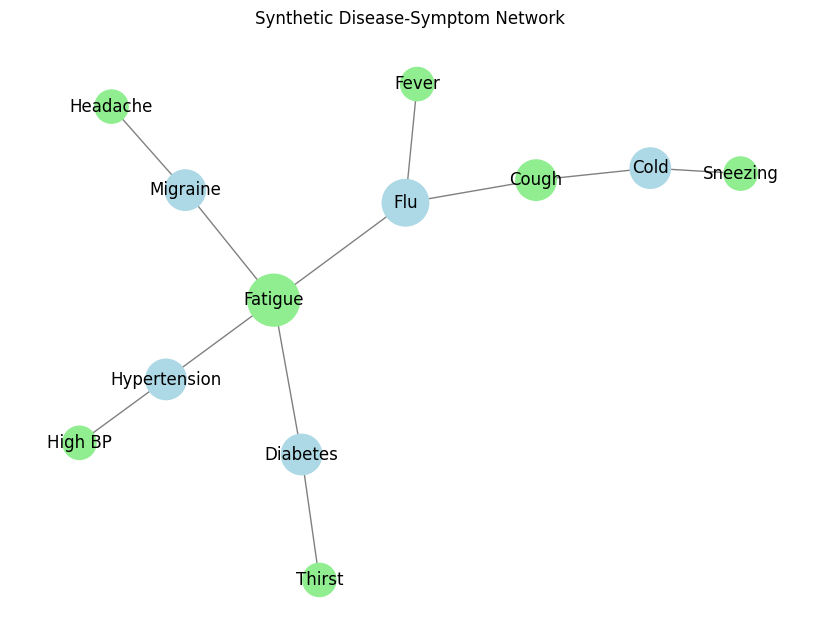

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# ----------------------------
# Step 1: Define diseases and symptoms
# ----------------------------
diseases = ["Flu", "Cold", "Diabetes", "Hypertension", "Migraine"]
symptoms = ["Fever", "Cough", "Fatigue", "Headache", "High BP", "Thirst", "Sneezing"]

# Create bipartite graph
G = nx.Graph()
G.add_nodes_from(diseases, bipartite=0)   # Disease nodes
G.add_nodes_from(symptoms, bipartite=1)   # Symptom nodes

# Define disease-symptom connections
edges = [
    ("Flu", "Fever"), ("Flu", "Cough"), ("Flu", "Fatigue"),
    ("Cold", "Cough"), ("Cold", "Sneezing"),
    ("Diabetes", "Thirst"), ("Diabetes", "Fatigue"),
    ("Hypertension", "High BP"), ("Hypertension", "Fatigue"),
    ("Migraine", "Headache"), ("Migraine", "Fatigue")
]
G.add_edges_from(edges)

# ----------------------------
# Step 2: Community Detection
# ----------------------------
partition = community_louvain.best_partition(G)

# ----------------------------
# Step 3: Centrality Measures
# ----------------------------
deg_cent = nx.degree_centrality(G)
bet_cent = nx.betweenness_centrality(G)

# ----------------------------
# Step 4: Disease Prediction Function
# ----------------------------
def predict_disease(input_symptoms):
    # Count matching symptoms per disease
    disease_scores = {disease: 0 for disease in diseases}
    for symptom in input_symptoms:
        if symptom in G:
            for neighbor in G.neighbors(symptom):
                if neighbor in diseases:
                    disease_scores[neighbor] += 1
    # Sort diseases by matching symptom count
    sorted_diseases = sorted(disease_scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_diseases

# ----------------------------
# Step 5: User Input
# ----------------------------
print("Available symptoms:", symptoms)
input_symptoms = input("Enter your symptoms separated by comma: ").split(",")
input_symptoms = [s.strip() for s in input_symptoms]

# Predict diseases
predictions = predict_disease(input_symptoms)
print("\n🔹 Likely diseases based on input symptoms:")
for disease, score in predictions:
    if score > 0:
        print(f"{disease} (matched symptoms: {score})")

# ----------------------------
# Step 6: Visualize network
# ----------------------------
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
colors = ["lightblue" if n in diseases else "lightgreen" for n in G.nodes()]
sizes = [deg_cent[n]*3000 + 300 for n in G.nodes()]  # node size ~ degree centrality
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=sizes, edge_color='gray')
plt.title("Synthetic Disease-Symptom Network")
plt.show()


In [8]:
# Predict diseases
predictions = predict_disease(input_symptoms)
print("\n🔹 Likely diseases based on input symptoms:")
for disease, score in predictions:
    if score > 0:
        print(f"{disease} (matched symptoms: {score})")


🔹 Likely diseases based on input symptoms:


#test 2

In [55]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Final_Augmented_dataset_Diseases_and_Symptoms.csv")

In [ ]:
import pandas as pd

chunk_size = 50000  # Number of rows per chunk
for i, chunk in enumerate(pd.read_csv('Final_Augmented_dataset_Diseases_and_Symptoms.csv', chunksize=chunk_size)):
    # Process each chunk here (e.g., filter rows, aggregate data)
    print(f"Processing chunk with {len(chunk)} rows.")
    # Example: Save processed chunks to a new CSV
    chunk.to_csv(f'processed_data{i}.csv', mode='a', header=False, index=False)

Processing chunk with 50000 rows.
Processing chunk with 50000 rows.
Processing chunk with 50000 rows.
Processing chunk with 50000 rows.
Processing chunk with 46945 rows.


In [56]:
df.shape

(246945, 378)

In [54]:
# from pyspark.sql import SparkSession

# # Create a SparkSession
# spark = SparkSession.builder \
#     .appName("LoadCSV") \
#     .getOrCreate()

# # Path to your CSV file
# csv_file_path = "Final_Augmented_dataset_Diseases_and_Symptoms.csv"

# # Load the CSV file into a DataFrame
# df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# # Display the DataFrame and its schema
# df.show()
# df.printSchema()

# # Stop the SparkSession
# spark.stop()

In [77]:
df.head(5)

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [78]:
len(df["diseases"].unique())

773

In [76]:
df.columns.value_counts()

,count
neck weakness,1
diseases,1
anxiety and nervousness,1
depression,1
shortness of breath,1
...,...
sore throat,1
hoarse voice,1
breathing fast,1
irregular heartbeat,1


In [58]:
# Create graph
G = nx.Graph()

for _, row in df.iterrows():
    disease = row["diseases"]
    for symptom, present in row.drop("diseases").items():
        if present == 1:
            G.add_edge(disease, symptom)

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Graph has 1097 nodes and 5388 edges


In [79]:
773+ 378

1151

In [59]:
disieses= df["diseases"].unique()
disieses, len(disieses)

(array(['panic disorder', 'vocal cord polyp', 'turner syndrome',
        'cryptorchidism', 'poisoning due to ethylene glycol',
        'atrophic vaginitis', 'fracture of the hand',
        'cellulitis or abscess of mouth', 'eye alignment disorder',
        'headache after lumbar puncture', 'pyloric stenosis',
        'salivary gland disorder', 'osteochondrosis', 'injury to the knee',
        'metabolic disorder', 'vaginitis', 'sick sinus syndrome',
        'tinnitus of unknown cause', 'glaucoma', 'eating disorder',
        'transient ischemic attack', 'pyelonephritis',
        'rotator cuff injury', 'chronic pain disorder',
        'problem during pregnancy', 'liver cancer', 'atelectasis',
        'injury to the hand', 'choledocholithiasis', 'injury to the hip',
        'cirrhosis', 'thoracic aortic aneurysm', 'subdural hemorrhage',
        'diabetic retinopathy', 'fibromyalgia', 'ischemia of the bowel',
        'fetal alcohol syndrome', 'peritonitis', 'injury to the abdomen',
        

In [60]:
from networkx.algorithms import community

# Greedy modularity
communities = community.greedy_modularity_communities(G)

# Print top communities
for i, comm in enumerate(communities[:5], 1):
    print(f"Community {i}: {list(comm)[:10]} ...")

Community 1: ['anxiety', 'esophageal cancer', 'atrial flutter', 'cough', 'gum pain', 'jaw disorder', 'pharyngitis', 'bleeding gums', 'increased heart rate', 'lyme disease'] ...
Community 2: ['dermatitis due to sun exposure', 'knee stiffness or tightness', 'ache all over', 'skin swelling', 'wrist stiffness or tightness', 'ankle swelling', 'back stiffness or tightness', 'syphilis', 'injury of the ankle', 'open wound of the foot'] ...
Community 3: ['anxiety and nervousness', 'macular degeneration', 'bipolar disorder', 'factitious disorder', 'narcolepsy', 'ependymoma', 'syndrome of inappropriate secretion of adh (siadh)', 'dementia', 'restlessness', 'abusing alcohol'] ...
Community 4: ['hpv', 'vaginal itching', 'scanty menstrual flow', 'atonic bladder', 'hydrocele of the testicle', 'groin mass', 'spontaneous abortion', 'polycystic kidney disease', 'penis pain', 'ovarian cyst'] ...
Community 5: ['vitamin a deficiency', 'aspergillosis', 'knee lump or mass', 'scurvy', 'carcinoid syndrome', 'g

In [68]:
def top10(cent_dict, name):
    top_nodes = sorted(cent_dict.items(), key=lambda x: -x[1])[:10]
    print(f"\nTop 10 by {name}:")
    for node, score in top_nodes:
        print(f"  Node {node}: {score:.4f}")

In [72]:
# Degree centrality (importance)
deg_centrality = nx.degree_centrality(G)
# top_symptoms = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# print("\nTop Symptoms by Centrality:")
# for sym, score in top_symptoms:
#     print(f"{sym}: {score:.3f}")
top10(deg_centrality, "Degree")


Top 10 by Degree:
  Node sharp abdominal pain: 0.1232
  Node headache: 0.1058
  Node sharp chest pain: 0.0949
  Node shortness of breath: 0.0922
  Node cough: 0.0912
  Node vomiting: 0.0894
  Node dizziness: 0.0858
  Node nausea: 0.0730
  Node depressive or psychotic symptoms: 0.0693
  Node fever: 0.0693


In [73]:
# Approximate Betweenness (much faster: sample k nodes)
betweenness_centrality = nx.betweenness_centrality(G, k=500, seed=42)

# top5(degree_centrality, "Degree")
top10(betweenness_centrality, "Betweenness (approx)")
# top5(closeness_centrality, "Closeness")


Top 10 by Betweenness (approx):
  Node headache: 0.0991
  Node sharp abdominal pain: 0.0956
  Node cough: 0.0638
  Node dizziness: 0.0552
  Node sharp chest pain: 0.0506
  Node shortness of breath: 0.0502
  Node vomiting: 0.0451
  Node fever: 0.0413
  Node back pain: 0.0400
  Node leg pain: 0.0390


In [74]:
closeness_centrality = nx.closeness_centrality(G)
top10(closeness_centrality, "Closeness")


Top 10 by Closeness:
  Node headache: 0.3616
  Node sharp abdominal pain: 0.3583
  Node cough: 0.3490
  Node vomiting: 0.3479
  Node shortness of breath: 0.3454
  Node dizziness: 0.3452
  Node sharp chest pain: 0.3439
  Node depression: 0.3403
  Node nausea: 0.3402
  Node fever: 0.3397


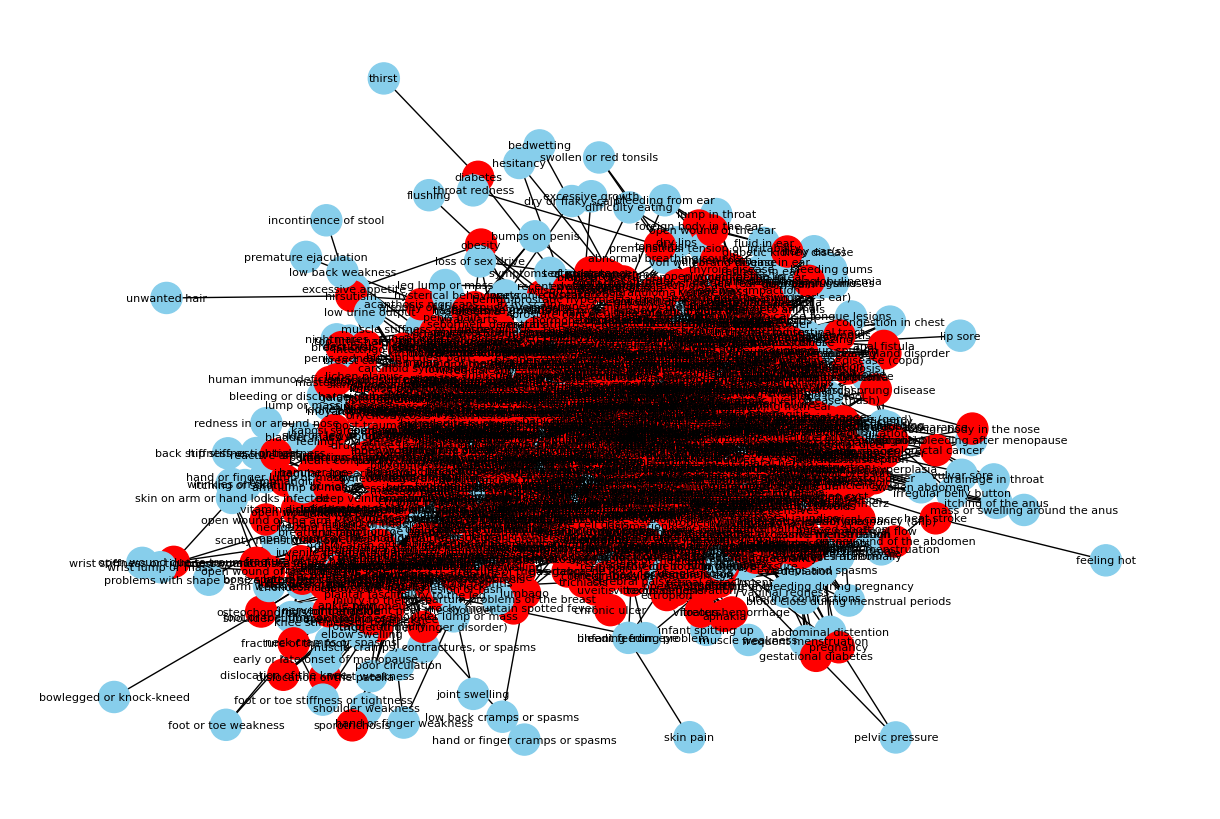

In [62]:
plt.figure(figsize=(12,8))

# Node colors
color_map = []
for node in G.nodes():
    if node in df["diseases"].values:
        color_map.append("red")   # disease
    else:
        color_map.append("skyblue")  # symptom

pos = nx.spring_layout(G, k=0.3, iterations=30)
nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=500, font_size=8)

plt.show()

In [20]:
!pip install pyvis

In [63]:
# pip install pyvis
from pyvis.network import Network
import pandas as pd
import networkx as nx

# Load dataset
df = pd.read_csv("Final_Augmented_dataset_Diseases_and_Symptoms.csv")

# Create graph
G = nx.Graph()

for _, row in df.iterrows():
    disease = row["diseases"]
    for symptom, present in row.drop("diseases").items():
        if present == 1:
            G.add_edge(disease, symptom)


# Create pyvis interactive graph
net = Network(height="800px", width="100%", notebook=True, bgcolor="#ffffff", font_color="black")
net.from_nx(G)

# Color diseases vs symptoms
disease_nodes = set(df["diseases"].values)
for node in net.nodes:
    if node["id"] in disease_nodes:
        node["color"] = "red"
        node["size"] = 25
        node["title"] = f"Disease: {node['id']}"
    else:
        node["color"] = "skyblue"
        node["size"] = 15
        node["title"] = f"Symptom: {node['id']}"

# Save as HTML
net.show("disease_symptom_network.html")
print("✅ Saved: disease_symptom_network.html")

disease_symptom_network.html
✅ Saved: disease_symptom_network.html
